In [1]:
# Importing necessary libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
tf.__version__

'2.9.2'

In [3]:
# Loading the fasion MNIST dataset from Keras API

fashion_mnist = keras.datasets.fashion_mnist

In [4]:
# Load the train and test split from fashion MNIST dataset

(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
# Shape of the dataset

print(f'training set images shape is : {train_img.shape}')
print(f'training set labels shape is : {train_labels.shape}')
print(f'test set images shape is : {test_img.shape}')
print(f'training set labels shape is : {test_labels.shape}')



training set images shape is : (60000, 28, 28)
training set labels shape is : (60000,)
test set images shape is : (10000, 28, 28)
training set labels shape is : (10000,)


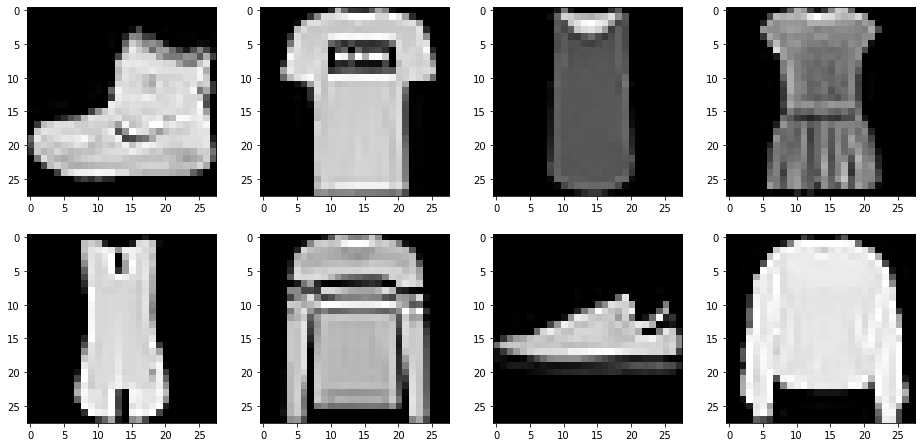

In [8]:
# Plotting the training set images

fig = plt.gcf()
fig.set_size_inches(16,16)
for index in range(8):
    sp = plt.subplot(4,4,index+1)
    plt.imshow(train_img[index], cmap='gray')

# New Section

In [9]:
# Normalizing the pixel values from 0 to 1

train_img = train_img/255.0
test_img = test_img/255.0

In [10]:
# Defining the convolutional model with 3 conv. layers and 3 layers of pooling and 2 dense layers

model = keras.models.Sequential([
        keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64,(3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(16,(3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])

In [11]:
# Printing out the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 16)          9232      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 16)         0

In [12]:
# Fitting the data into the model

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer= RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_img, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 102s 54ms/step - loss: 0.6354 - accuracy: 0.7649
Epoch 2/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.4136 - accuracy: 0.8479
Epoch 3/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.3549 - accuracy: 0.8701
Epoch 4/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.3223 - accuracy: 0.8828
Epoch 5/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.3033 - accuracy: 0.8893


In [13]:
# Evaluating the model on unseen data(test set)

model.evaluate(test_img, test_labels)

313/313 [==============================] - 5s 15ms/step - loss: 0.3676 - accuracy: 0.8694


[0.36764398217201233, 0.8694000244140625]

In [14]:
# The probability that this item is each of the 10 classes

classifications = model.predict(test_img)

print(classifications[0])

313/313 [==============================] - 5s 14ms/step
[1.4740347e-05 1.2727401e-10 1.4240813e-09 6.2866206e-07 7.0627992e-09
 2.5764821e-04 5.7374755e-06 1.0081965e-02 4.4084823e-06 9.8963487e-01]


In [15]:
max(classifications[0])

0.9896349

In [16]:
classifications.shape

(10000, 10)

In [17]:
print(test_labels[0])  # -----> first img

9


In [18]:
# Defining a new model which has 3 dense layers

model = keras.models.Sequential([
        keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64,(3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(16,(3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])

In [19]:
# Fitting the data into the new model

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_img, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.6041 - accuracy: 0.7764
Epoch 2/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.4107 - accuracy: 0.8504
Epoch 3/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.3565 - accuracy: 0.8699
Epoch 4/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.3269 - accuracy: 0.8803
Epoch 5/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.3058 - accuracy: 0.8866
Epoch 6/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.2884 - accuracy: 0.8941
Epoch 7/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2732 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.2599 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.2472 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 96s 5

In [20]:
# Evaluating the model

model.evaluate(test_img, test_labels)

313/313 [==============================] - 5s 15ms/step - loss: 0.3349 - accuracy: 0.8791


[0.3348575532436371, 0.8791000247001648]

In [21]:
classifications = model.predict(test_img)

print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 5s 15ms/step
[5.4232925e-07 3.9343693e-09 2.0679212e-11 1.4317601e-07 2.8099119e-09
 6.8041496e-05 1.0150259e-07 2.0381862e-03 3.4690650e-08 9.9789304e-01]
9


In [23]:
# Defining callback class

class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('loss')<0.23):
          print("Canceling Training")
          self.model.stop_training = True

In [27]:
callback = myCallbacks()

model = keras.models.Sequential([
        keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64,(3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(16,(3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_img, train_labels, epochs = 20, callbacks = [callback])

Epoch 1/20
1875/1875 [==============================] - 102s 54ms/step - loss: 0.6004 - accuracy: 0.7790
Epoch 2/20
1875/1875 [==============================] - 98s 52ms/step - loss: 0.4058 - accuracy: 0.8517
Epoch 3/20
1875/1875 [==============================] - 100s 53ms/step - loss: 0.3485 - accuracy: 0.8726
Epoch 4/20
1875/1875 [==============================] - 100s 53ms/step - loss: 0.3181 - accuracy: 0.8831
Epoch 5/20
1875/1875 [==============================] - 98s 52ms/step - loss: 0.2956 - accuracy: 0.8914
Epoch 6/20
1875/1875 [==============================] - 96s 51ms/step - loss: 0.2799 - accuracy: 0.8970
Epoch 7/20
1875/1875 [==============================] - 98s 52ms/step - loss: 0.2639 - accuracy: 0.9026
Epoch 8/20
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2502 - accuracy: 0.9072
Epoch 9/20
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2398 - accuracy: 0.9115
Epoch 10/20
1875/1875 [==============================] - 98

In [28]:
# Plotting the history

history.history.keys()

dict_keys(['loss', 'accuracy'])

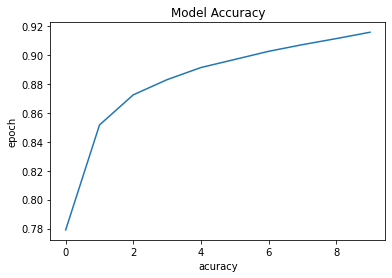

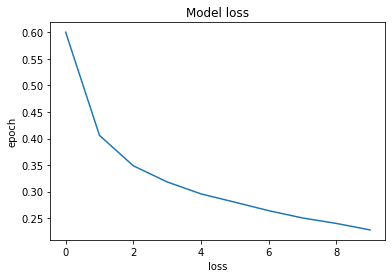

In [32]:
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel("acuracy")
plt.ylabel("epoch")
plt.show()
plt.plot(history.history['loss'])
plt.title("Model loss")
plt.xlabel("loss")
plt.ylabel("epoch")
plt.show()